In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [28]:
def add_one(x):
    X=np.vstack((x,np.ones(len(x))))
    return X.T

def reg_analit(X,y):
    k = np.dot(np.linalg.pinv(X),y)
    return k

def pedict(x,k):
    X = add_one(x)
    y = np.dot(X,k)
    return y

def loss(x,y,k):
    n=y.shape[0]
    l = np.sum((y - (x*k[0]+k[1]))**2) / n
    return l

def predict_height(x,k,norm=True):
    if norm:
        return k[0]*(x-mean_weight) + k[1] + mean_height
    else:
        return k[0]*x + k[1]
    
def predict_logeg(x,w,b,prob=False):
    z=np.dot(x,w)+b
    a=sigmoid(z)
    if prob:
        return a
    else:
        return a>0.5
    
def log_loss(y,x,w,b):
    z=np.dot(x,w)+b
    a=sigmoid(z)
    return np.sum(-y*np.log(a)-(1-y)*np.log(1-a))

In [2]:
plt.style.use('ggplot')

## Linear regression

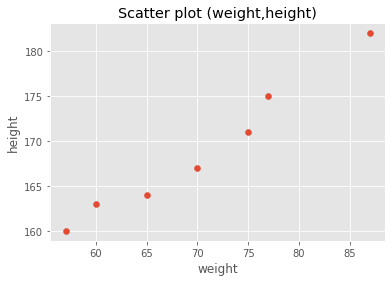

In [3]:
height=np.array([160,163,164,167,171,175,182])
weight=np.array([57,60,65,70,75,77,87])
plt.title('Scatter plot (weight,height)')
plt.xlabel('weight')
plt.ylabel('height')
plt.scatter(weight, height)
plt.show()

## We need to find line that will aproximate our points: y = kx +b

In [4]:
X=np.vstack((weight,np.ones(len(weight))))
X = X.T
X

array([[57.,  1.],
       [60.,  1.],
       [65.,  1.],
       [70.,  1.],
       [75.,  1.],
       [77.,  1.],
       [87.,  1.]])

## $$ X * \vec{w} = \vec{y} $$
## $$ \vec{w} = (X^T*X)^{-1} * X^T * \vec{y} $$

In [5]:
k = np.dot(np.linalg.pinv(X),height)
k

array([  0.72335798, 118.11874728])

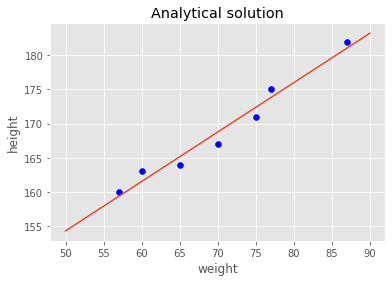

In [8]:
x=np.linspace(50,90,100)
plt.title('Analytical solution')
plt.xlabel('weight')
plt.ylabel('height')
plt.scatter(weight, height, c='blue')
plt.plot(x,predict_height(x,k,norm=False))

## Gradient descent

## $$ MSE:  J = \frac{1}{m}*\sum(y-a)^2 $$
## $$ a= X*w +b $$

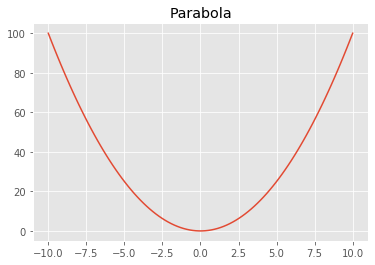

In [103]:
u=np.linspace(-10,10,100)
plt.title('Parabola')
plt.plot(u,u**2)
plt.show()

<IPython.core.display.Javascript object>


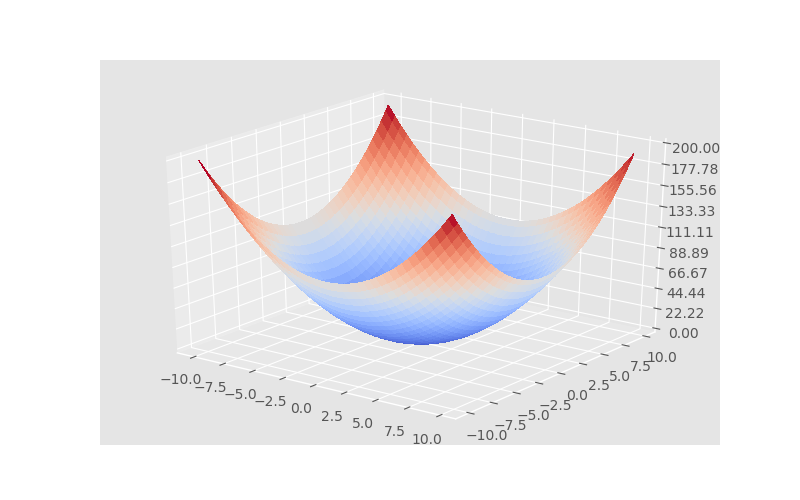

In [108]:
%matplotlib notebook
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z= X**2 + Y**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

Loss: 6.275510204081633
MSE: 1.606778842496307


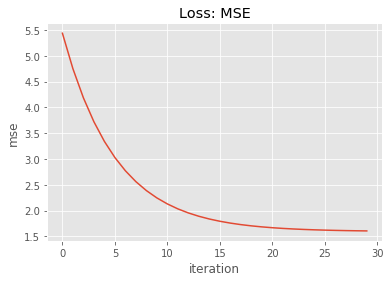

In [9]:
#def minimizer()
n = height.shape[0]
mean_height = np.mean(height)
mean_weight = np.mean(weight)

h_norm = (height - mean_height)
w_norm = (weight - mean_weight)
k=np.array([0.5, 0])
K=k.copy()
lr=0.001
mse=[]
print(f'Loss: {loss(w_norm, h_norm, k)}')
for i in range(30):
    k[0] = k[0] + lr * (np.sum((h_norm-(w_norm*k[0]+k[1]))*w_norm))/n
    k[1] = k[1] + lr * (np.sum(h_norm-(w_norm*k[0]+k[1])))/n
    K=np.vstack((K,k))
    err = loss(w_norm, h_norm, k)
    mse.append(err)
print(f'MSE: {err}')
plt.ylabel('mse')
plt.xlabel('iteration')
plt.title('Loss: MSE')
plt.plot(mse)
plt.show()

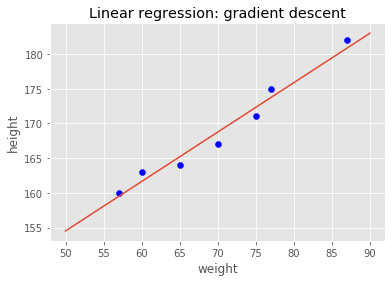

In [10]:
x=np.linspace(50,90,100)
y=k[0]*x + k[1] + mean_height
plt.scatter(weight, height, c='blue')
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Linear regression: gradient descent')
plt.plot(x,predict_height(x,k))
plt.show()

In [11]:
#Annimation

In [12]:
def animate(i):
    plt.clf()
    x=np.linspace(50,90,100)
    k=K[i]
    plt.subplot(1,2,1)
    plt.xlabel('weight')
    plt.ylabel('height')
    plt.title(f'Linear regression. iter: {i} mse: {mse[i]}')
    plt.xlim(np.min(weight),np.max(weight))
    plt.ylim(np.min(height),np.max(height))
    plt.scatter(weight, height, c='blue')
    plt.plot(x,predict_height(x,k))
    plt.subplot(1,2,2)
    plt.title(f'mse: {mse[i]}')
    plt.xlim(0,len(mse)+1)
    plt.ylim(np.min(mse), np.max(mse))
    plt.plot(mse[:i+1])

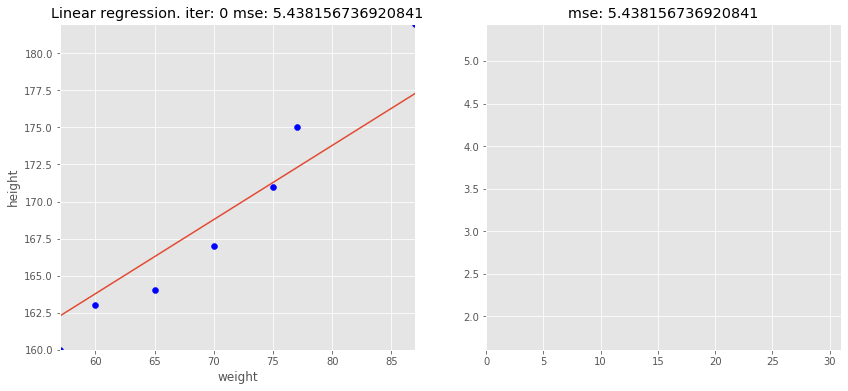

In [13]:
fig = plt.figure(figsize=(14,6))
ani = animation.FuncAnimation(fig, animate, frames = 30, repeat=True)
HTML(ani.to_jshtml())

## Logistic regression

In [87]:
#logistic regression
def sigmoid(z): 
    return 1/(1+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

## $$ sigmoid = \frac{1}{1+e^{-z}} $$
### $$ z = X*w + b $$

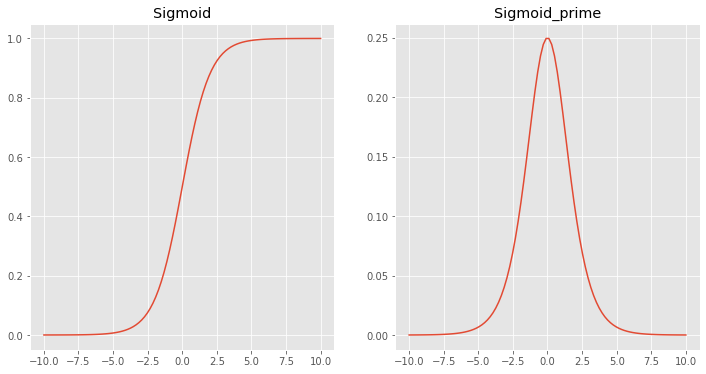

In [88]:
x=np.linspace(-10,10,100)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Sigmoid')
plt.plot(x,sigmoid(x))
plt.subplot(1,2,2)
plt.title('Sigmoid_prime')
plt.plot(x,sigmoid_prime(x))

In [14]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [77]:
data = make_blobs(n_samples=100,n_features=2, centers=2,center_box=(-4.0, 4.0),cluster_std=1.9,random_state = 10)

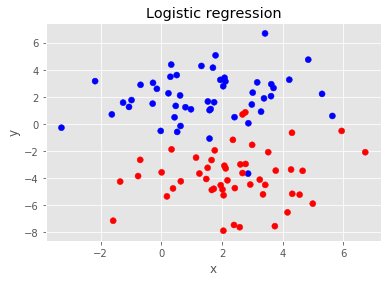

In [78]:
plt.title('Logistic regression')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0][:,0],data[0][:,1],c=['r' if i==0 else 'b' for i in data[1]],)

In [79]:
X=data[0]
y=data[1]
colors = ['r' if i==0 else 'b' for i in data[1]]
model=LogisticRegression()

In [80]:
X[0]

array([2.98222204, 1.43102165])

In [81]:
X[0].shape

(2,)

In [82]:
model.fit(X,y)

c:\users\vash\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
np.sum(y==model.predict(X))/X.shape[0]

0.96

In [84]:
model.predict(X[0].reshape(1,2))

array([1])

In [85]:
X[:,0].min()

-3.2915104456187807

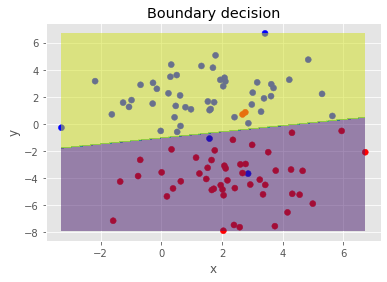

In [86]:
step = 0.02
plt.scatter(X[:,0],X[:,1],c=colors)
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx,yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)
plt.title('Boundary decision')
plt.xlabel('x')
plt.ylabel('y')
plt.contourf(xx,yy,Z,alpha=0.5)
plt.show()

Log_loss: 67.3828154803657
Log_loss: 14.846420017389677


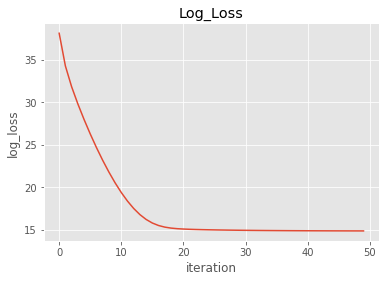

In [89]:
#def minimizer()

w=np.array([0.01, 0.015])
b=0
W=w.copy()
B=b
lr=0.03
cross_entropy=[]
print(f'Log_loss: {log_loss(y, X, w, b)}')
for i in range(50):
    z = np.dot(X,w)+b
    w = w + lr * np.dot(X.T,(y-sigmoid(z)))
    b = b + lr * np.sum(y-sigmoid(z))
    W=np.vstack((W,w))
    B=np.vstack((B,b))
    err = log_loss(y,X,w,b)
    cross_entropy.append(err)
print(f'Log_loss: {err}')
plt.ylabel('log_loss')
plt.xlabel('iteration')
plt.title('Log_Loss')
plt.plot(cross_entropy)
plt.show()

In [90]:
W[-1]

array([-0.45189247,  1.42475804])

In [91]:
B[-1]

array([1.95383229])

In [92]:
model.coef_

array([[-0.28285758,  1.25016756]])

In [93]:
model.intercept_

array([1.29203706])

In [94]:
p = (predict_logeg(X,w,b)>0.5)
np.sum(y==p)/y.shape[0]

0.96

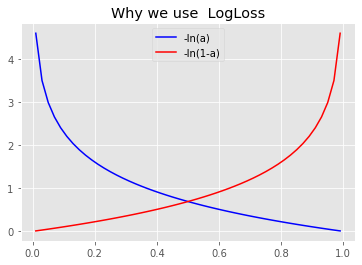

In [95]:
#Why we use Logloss
x=np.linspace(0.01, 0.99)
plt.title('Why we use  LogLoss')
plt.plot(x, -np.log(x),c='b', label='-ln(a)')
plt.plot(x, -np.log(1-x),c='r', label='-ln(1-a)')
plt.legend()
plt.show()

## $$ Loss = -\sum (y*log(a)+(1-y)*log(1-a)) $$

In [96]:
def animate_log(i):
    plt.clf()
    
    step = 0.02
    w=W[i]
    b=B[i]
    plt.subplot(1,2,1)
    plt.title(f'Logistic regression. iter: {i}, logloss: {cross_entropy[i]}')
    plt.scatter(X[:,0],X[:,1],c=colors)
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    xx,yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
    Z=predict_logeg(np.c_[xx.ravel(), yy.ravel()],w,b)
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,alpha=0.5)
    plt.subplot(1,2,2)
    plt.ylabel('log_loss')
    plt.xlabel('iteration')
    plt.title(f'Log_Loss: {cross_entropy[i]}')
    plt.xlim(0,len(cross_entropy)+1)
    plt.ylim(np.min(cross_entropy), np.max(cross_entropy))
    plt.plot(cross_entropy[:i+1])

Text(0, 0.5, 'y')

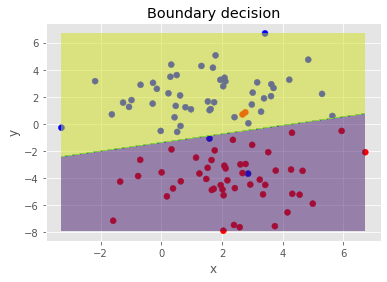

In [97]:
step = 0.02
w=W[-1]
b=B[-1]
plt.title('Logistic regression')
plt.scatter(X[:,0],X[:,1],c=colors)
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx,yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))

Z=predict_logeg(np.c_[xx.ravel(), yy.ravel()],w,b)
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.5)
plt.title('Boundary decision')
plt.xlabel('x')
plt.ylabel('y')

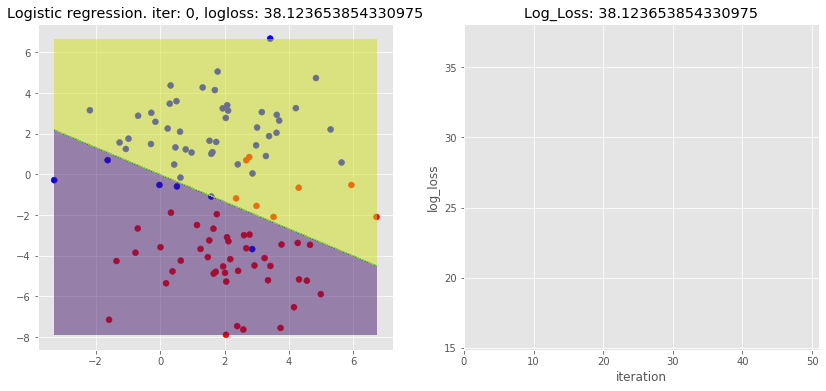

In [98]:
fig = plt.figure(figsize=(14,6))
ani = animation.FuncAnimation(fig, animate_log, frames = 50, repeat=True)
HTML(ani.to_jshtml())